<a href="https://colab.research.google.com/github/jithumia/jithumia/blob/main/PRE_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import interpolate
import matplotlib.pyplot as plt
import numbers
from matplotlib import cm
from itertools import cycle, islice
import os


In [55]:
dose=float(input("Enter the Prescribed Dose in Gy"))
plot_lim=dose+15
steps=float(dose/0.05)

def List_txt_cli():
    files = os.listdir()   # return a list of files
    files.sort()
    return [file for file in files if file.endswith('LI.txt')]
def List_txt_kbp():
    files = os.listdir()   # return a list of files
    files.sort()
    return [file for file in files if file.endswith('BP.txt')]

def Load_patient(file):  # file = 'Case1_AAA.txt'  string
    with open(file, "r") as file_:
        my_file = [line for line in file_.readlines()]  # my_file is a list representation of the text file
    file_.close()
    file_len = len(my_file)                                # number of lines in the file
    patID = my_file[1].split(':')[-1].strip('\n').strip()
    planID = my_file[10].split(':')[-1].strip('\n').strip()
    ## Get the structures
    structures_indexs_list = []
    structures_names_list  = []
    for i, line in enumerate(my_file):
        if line.startswith('Structure:'):
            structures_indexs_list.append(i)
            structures_names_list.append(line.split(':')[-1].strip('\n').strip())


    ##structures_names_list = ['PTV CHEST', 'Foramen'] # hard code to limit number of structures and prevent memory issues

    print(file + ' loaded \t patID:' + patID + ' PlanID:' + planID + ' and number of structures is ' + str(len(structures_names_list)))
    dose_index = np.linspace(0, 46, 921)  # New dose index in range 0 - dose Gy in 0.05 Gy steps

    data = np.zeros((dose_index.shape[0], len(structures_names_list)))

    # iterate through all structures and place interpolated DVH data in matrix
    for i, index in enumerate(structures_indexs_list):
        start = structures_indexs_list[i]+24  # first line of DVH data
        if i < len(structures_indexs_list)-1:
            end = structures_indexs_list[i+1]-2  # find the last line of the DVH from the next index, BEWARE THE +1
        else:
            end = len(my_file)-2
        DVH_data = my_file[start:end]  # get list with data

        DVH_list = [line.split() for line in DVH_data]  # create list of lists split
        Rel_dose_pct, Dose_Gy, Ratio_pct = zip(*DVH_list) # unzip to 3 lists, they are strings so conver to float

        Ratio_pct = np.asarray(Ratio_pct, dtype=np.float32)
        Dose_Gy = np.asarray(Dose_Gy, dtype=np.float32)
        ## Now working with dose data

        f = interpolate.interp1d(x=Dose_Gy,y=Ratio_pct, bounds_error=False, fill_value=0)   # returns a linear interpolate function, fill values outside range wiwth 0

        data[:,i] = f(dose_index)

    my_iterables = [structures_names_list]
    my_index = pd.MultiIndex.from_product(my_iterables, names = ['Structure'])

    df = pd.DataFrame(data.T, index = my_index)
    df = df.T
    df.index  = dose_index
    df.index.name = 'Dose (Gy)'
    return df    

def Load_files_to_df(files_list):    # pass a list of files to load into a df
    for i, file in enumerate(files_list):
        if i == 0:
            multi_df = Load_patient(file)
        else:
            multi_df = pd.concat([multi_df, Load_patient(file)], axis=1)
    return multi_df



Enter the Prescribed Dose in Gy40


In [56]:
txt_files_cli = List_txt_cli()
txt_files_cli

['1_AIYSHA_CR51047_CLI.txt',
 '2_SUPRABHA_CS05290_CLI.txt',
 '3_SIMA_JHA_CS50344_CLI.txt',
 '5_SANDHYA_PINGLE_CT02360_CLI.txt',
 '6_DEVPURANA_DEVI_CT03033_CLI.txt',
 '7_SHRIMATI_CT03314_CLI.txt',
 '8_RITA_DEVI_CT07966_CLI.txt',
 '9_VAISHALI_CT50108CLI.txt']

In [57]:
txt_files_kbp = List_txt_kbp()
txt_files_kbp

['1_AIYSHA_CR51047_KBP.txt',
 '2_SUPRABHA_CS05290_KBP.txt',
 '3_SIMA_JHA_CS50344_KBP.txt',
 '5_SANDHYA_PINGLE_CT02360_KBP.txt',
 '6_DEVPURANA_DEVI_CT03033_KBP.txt',
 '7_SHRIMATI_CT03314_KBP.txt',
 '8_RITA_DEVI_CT07966_KBP.txt',
 '9_VAISHALI_CT50108_KBP.txt']

In [58]:
df_cli = Load_files_to_df(txt_files_cli)

1_AIYSHA_CR51047_CLI.txt loaded 	 patID:CR/51047 PlanID:Clinical40G and number of structures is 12
2_SUPRABHA_CS05290_CLI.txt loaded 	 patID:CS/05290 PlanID:Clinical40 and number of structures is 12
3_SIMA_JHA_CS50344_CLI.txt loaded 	 patID:CS/50344 PlanID:Clinical40G and number of structures is 12
5_SANDHYA_PINGLE_CT02360_CLI.txt loaded 	 patID:CT/02360 PlanID:Clinical40G and number of structures is 12
6_DEVPURANA_DEVI_CT03033_CLI.txt loaded 	 patID:CT/03033 PlanID:Clinical40G and number of structures is 12
7_SHRIMATI_CT03314_CLI.txt loaded 	 patID:CT/03314 PlanID:Clinical40G and number of structures is 12
8_RITA_DEVI_CT07966_CLI.txt loaded 	 patID:CT/07966 PlanID:Clinical40G and number of structures is 12
9_VAISHALI_CT50108CLI.txt loaded 	 patID:CT/50108 PlanID:Clinical40G and number of structures is 12


In [59]:
df_kbp = Load_files_to_df(txt_files_kbp)

1_AIYSHA_CR51047_KBP.txt loaded 	 patID:CR/51047 PlanID:Validation40G and number of structures is 12
2_SUPRABHA_CS05290_KBP.txt loaded 	 patID:CS/05290 PlanID:Validation40 and number of structures is 12
3_SIMA_JHA_CS50344_KBP.txt loaded 	 patID:CS/50344 PlanID:Validation40G and number of structures is 12
5_SANDHYA_PINGLE_CT02360_KBP.txt loaded 	 patID:CT/02360 PlanID:Validation40G and number of structures is 12
6_DEVPURANA_DEVI_CT03033_KBP.txt loaded 	 patID:CT/03033 PlanID:Validation40G and number of structures is 12
7_SHRIMATI_CT03314_KBP.txt loaded 	 patID:CT/03314 PlanID:Validation40G and number of structures is 12
8_RITA_DEVI_CT07966_KBP.txt loaded 	 patID:CT/07966 PlanID:Validation40G and number of structures is 12
9_VAISHALI_CT50108_KBP.txt loaded 	 patID:CT/50108 PlanID:Validation40G and number of structures is 12


In [60]:
my_colors = list(islice(cycle(['b', 'g', 'r', 'c', 'm','y','k','darkred','orange','aqua','mediumpurple','gold']), None, len(df_cli)))

In [ ]:
pd.set_option('display.max_columns', None)
df_cli

In [ ]:
pd.set_option('display.max_columns', None)
df_kbp

In [ ]:
df_cli.shape

(921, 96)

In [ ]:
df_kbp.shape

(921, 96)

In [ ]:
df_cli.keys().unique()

MultiIndex([(    'PTV LT CW',),
            ('PTV LT IMN RP',),
            (   'PTV LT SCF',),
            (         'BODY',),
            (    'BREAST RT',),
            (    'ESOPHAGUS',),
            (        'Heart',),
            (          'LAD',),
            (      'LUNG LT',),
            (      'LUNG RT',),
            (  'SPINAL CORD',),
            (      'THYROID',),
            (   'PTV LT IMN',),
            (        'HEART',),
            (  'PTV CW EVAL',),
            (       'PTV CW',)],
           names=['Structure'])

In [ ]:
df_kbp.keys().unique()

MultiIndex([(    'PTV LT CW',),
            ('PTV LT IMN RP',),
            (   'PTV LT SCF',),
            (         'BODY',),
            (    'BREAST RT',),
            (    'ESOPHAGUS',),
            (        'Heart',),
            (          'LAD',),
            (      'LUNG LT',),
            (      'LUNG RT',),
            (  'SPINAL CORD',),
            (      'THYROID',),
            (   'PTV LT IMN',),
            (        'HEART',),
            (  'PTV CW EVAL',),
            (       'PTV CW',)],
           names=['Structure'])

In [66]:
df_cli.rename(columns = {'PTV CW EVAL':'PTV LT CW CLI','PTV LT SCF':'PTV LT SCF CLI','PTV CW' : 'PTV LT CW CLI','PTV LT CW' : 'PTV LT CW CLI','PTV LT IMN RP':'PTV LT IMN CLI','PTV LT IMN':'PTV LT IMN CLI','SpinalCord':'SPINALCORD CLI','SPINAL CORD':'SPINALCORD CLI','Heart' : 'HEART CLI','HEART' : 'HEART CLI','BODY' : 'BODY CLI','BREAST RT' : 'BREAST RT CLI','ESOPHAGUS' : 'ESOPHAGUS CLI','LAD' : 'LAD CLI','LUNG LT' : 'LUNG LT CLI','LUNG RT' : 'LUNG RT CLI','THYROID' : 'THYROID CLI',} , inplace = True) 


In [65]:
df_kbp.rename(columns = {'PTV CW EVAL':'PTV LT CW KBP','PTV CW' : 'PTV LT CW KBP','PTV LT SCF':'PTV LT SCF KBP','PTV LT CW' : 'PTV LT CW KBP','PTV LT IMN RP':'PTV LT IMN KBP','PTV LT IMN':'PTV LT IMN KBP','SpinalCord':'SPINALCORD KBP','SPINAL CORD':'SPINALCORD KBP','Heart' : 'HEART KBP','HEART' : 'HEART KBP','BODY' : 'BODY KBP','BREAST RT' : 'BREAST RT KBP','ESOPHAGUS' : 'ESOPHAGUS KBP','LAD' : 'LAD KBP','LUNG LT' : 'LUNG LT KBP','LUNG RT' : 'LUNG RT KBP','THYROID' : 'THYROID KBP',} , inplace = True) 


In [67]:
list(df_cli.keys().unique())

[('PTV LT CW CLI',),
 ('PTV LT IMN CLI',),
 ('PTV LT SCF CLI',),
 ('BODY CLI',),
 ('BREAST RT CLI',),
 ('ESOPHAGUS CLI',),
 ('HEART CLI',),
 ('LAD CLI',),
 ('LUNG LT CLI',),
 ('LUNG RT CLI',),
 ('SPINALCORD CLI',),
 ('THYROID CLI',)]

In [68]:
list(df_kbp.keys().unique())

[('PTV LT CW KBP',),
 ('PTV LT IMN KBP',),
 ('PTV LT SCF KBP',),
 ('BODY KBP',),
 ('BREAST RT KBP',),
 ('ESOPHAGUS KBP',),
 ('HEART KBP',),
 ('LAD KBP',),
 ('LUNG LT KBP',),
 ('LUNG RT KBP',),
 ('SPINALCORD KBP',),
 ('THYROID KBP',)]

In [69]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [70]:
def get_dmin(df):
    return df[(df < 100.0) & (df > 0.0)].idxmax()

def get_dmax(df):
    return df[(df < 100.0) & (df > 0.0)].idxmin()

def get_d_metric(df, D_metric_pct):                 # dunction to get e.g the D50% metric passing '50' and a DVH entry ()
    x = df.values[:,0]
    y = df.index.values
    f = interpolate.interp1d(x,y, bounds_error=False, fill_value=0)
    return f(D_metric_pct)*1    # adding the *1 turns it from an array to a double..


In [71]:
PTVLTCW_CLI=df_cli.loc[:,'PTV LT CW CLI']
PTVLTIMN_CLI=df_cli.loc[:,'PTV LT IMN CLI']
PTVLTSCF_CLI=df_cli.loc[:,'PTV LT SCF CLI']
BODY_CLI=df_cli.loc[:,'BODY CLI']
BREASTRT_CLI=df_cli.loc[:,'BREAST RT CLI']
ESOPHAGUS_CLI=df_cli.loc[:,'ESOPHAGUS CLI']
HEART_CLI=df_cli.loc[:,'HEART CLI']
LAD_CLI=df_cli.loc[:,'LAD CLI']
LUNGLT_CLI=df_cli.loc[:,'LUNG LT CLI']
LUNGRT_CLI=df_cli.loc[:,'LUNG RT CLI']
SPINALCORD_CLI=df_cli.loc[:,'SPINALCORD CLI']
THYROID_CLI=df_cli.loc[:,'THYROID CLI']

PTVLTCW_KBP=df_kbp.loc[:,'PTV LT CW KBP']
PTVLTIMN_KBP=df_kbp.loc[:,'PTV LT IMN KBP']
PTVLTSCF_KBP=df_kbp.loc[:,'PTV LT SCF KBP']
BODY_KBP=df_kbp.loc[:,'BODY KBP']
BREASTRT_KBP=df_kbp.loc[:,'BREAST RT KBP']
ESOPHAGUS_KBP=df_kbp.loc[:,'ESOPHAGUS KBP']
HEART_KBP=df_kbp.loc[:,'HEART KBP']
LAD_KBP=df_kbp.loc[:,'LAD KBP']
LUNGLT_KBP=df_kbp.loc[:,'LUNG LT KBP']
LUNGRT_KBP=df_kbp.loc[:,'LUNG RT KBP']
SPINALCORD_KBP=df_kbp.loc[:,'SPINALCORD KBP']
THYROID_KBP=df_kbp.loc[:,'THYROID KBP']



In [72]:
pd.set_option('display.max_columns', None)


In [73]:
df_cli_mean=df_cli.groupby(by=df_cli.columns, axis=1).apply(lambda g: g.mean(axis=1) if isinstance(g.iloc[0,0], numbers.Number) else g.iloc[:,0])

In [74]:
df_kbp_mean=df_kbp.groupby(by=df_kbp.columns, axis=1).apply(lambda g: g.mean(axis=1) if isinstance(g.iloc[0,0], numbers.Number) else g.iloc[:,0])

In [ ]:
df_cli_mean

In [75]:
df_PTVLTCW_cli=df_cli_mean.iloc[:,7]
df_PTVLTIMN_cli=df_cli_mean.iloc[:,8]
df_PTVLTSCF_cli=df_cli_mean.iloc[:,9]
df_BODY_cli=df_cli_mean.iloc[:,0]
df_BREASTRT_cli=df_cli_mean.iloc[:,1]
df_ESOPHAGUS_cli=df_cli_mean.iloc[:,2]
df_HEART_cli=df_cli_mean.iloc[:,3]
df_LAD_cli=df_cli_mean.iloc[:,4]
df_LUNGLT_cli=df_cli_mean.iloc[:,5]
df_LUNGRT_cli=df_cli_mean.iloc[:,6]
df_SPINALCORD_cli=df_cli_mean.iloc[:,10]
df_THYROID_cli=df_cli_mean.iloc[:,11]

df_PTVLTCW_kbp=df_kbp_mean.iloc[ : ,7]
df_PTVLTIMN_kbp=df_kbp_mean.iloc[ : ,8]
df_PTVLTSCF_kbp=df_kbp_mean.iloc[ : ,9]
df_BODY_kbp=df_kbp_mean.iloc[ : ,0]
df_BREASTRT_kbp=df_kbp_mean.iloc[ : ,1]
df_ESOPHAGUS_kbp=df_kbp_mean.iloc[ : ,2]
df_HEART_kbp=df_kbp_mean.iloc[ : ,3]
df_LAD_kbp=df_kbp_mean.iloc[ : ,4]
df_LUNGLT_kbp=df_kbp_mean.iloc[ : ,5]
df_LUNGRT_kbp=df_kbp_mean.iloc[ : ,6]
df_SPINALCORD_kbp=df_kbp_mean.iloc[ : ,10]
df_THYROID_kbp=df_kbp_mean.iloc[:,11]


In [ ]:
#df_HEART_cli
#df_HEART_cli.describe()
df_HEART_cli.shape




(921,)

In [ ]:
df_HEART_kbp

In [ ]:
df_HEART_cli.describe()

count    921.000000
mean     7.628696  
std      20.796419 
min      0.000000  
25%      0.070568  
50%      0.412227  
75%      2.912504  
max      100.000000
Name: (HEART CLI,), dtype: float64

In [ ]:
df_HEART_kbp.describe()

count    921.000000
mean     7.346830  
std      20.608478 
min      0.000000  
25%      0.061907  
50%      0.363562  
75%      2.554165  
max      100.000000
Name: (HEART KBP,), dtype: float64

In [ ]:
df_HEART_kbp.index

Float64Index([                0.0,                0.05,                 0.1,
              0.15000000000000002,                 0.2,                0.25,
              0.30000000000000004, 0.35000000000000003,                 0.4,
                             0.45,
              ...
               45.550000000000004,                45.6,  45.650000000000006,
                             45.7,               45.75,  45.800000000000004,
                            45.85,  45.900000000000006,               45.95,
                             46.0],
             dtype='float64', name='Dose (Gy)', length=921)

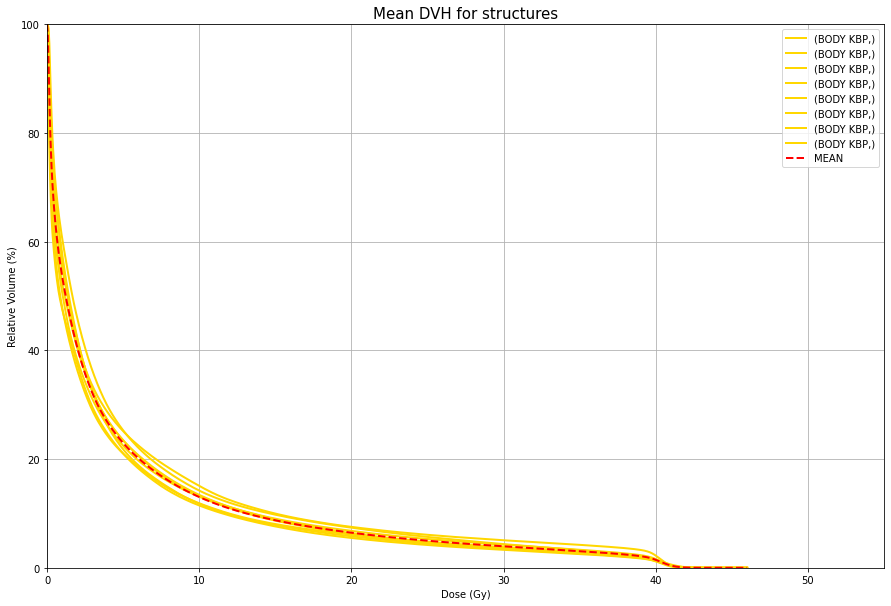

In [90]:
#1BODY KBP
#OKAY 1 ALL_ VS MEAN
ax=BODY_KBP.plot(figsize=(15,10),markevery=25,color='gold',linewidth=2.0)
df_BODY_kbp.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('BODY_KBP_ALL.pdf')  

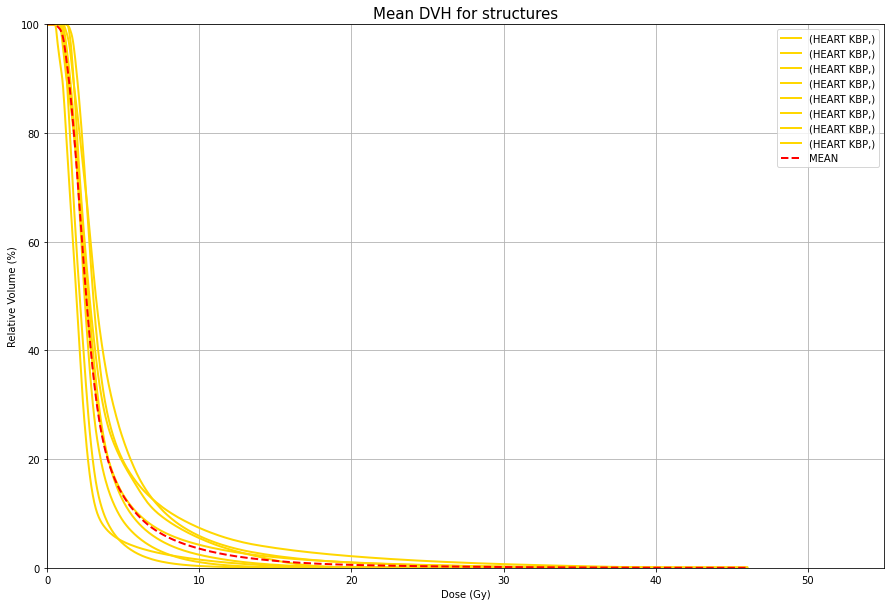

In [91]:
#2heart KBP
#OKAY 1 ALL_ VS MEAN
ax=HEART_KBP.plot(figsize=(15,10),markevery=25,color='gold',linewidth=2.0)
df_HEART_kbp.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('HEART_KBP_ALL.pdf')  

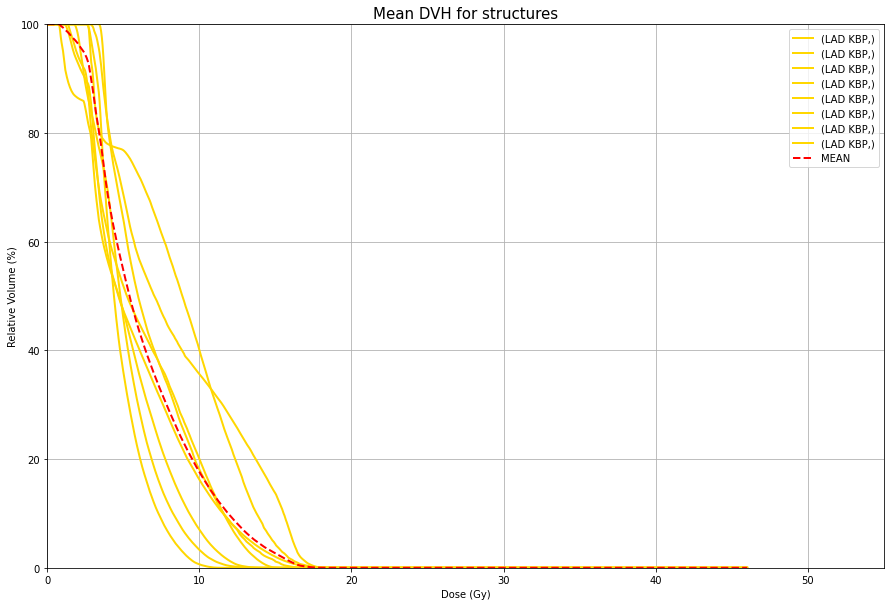

In [92]:
#3OKAY 1 ALL_ VS MEAN
#LAD KBP
ax=LAD_KBP.plot(figsize=(15,10),markevery=25,color='gold',linewidth=2.0)
df_LAD_kbp.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('LAD_KBP_ALL.pdf')  

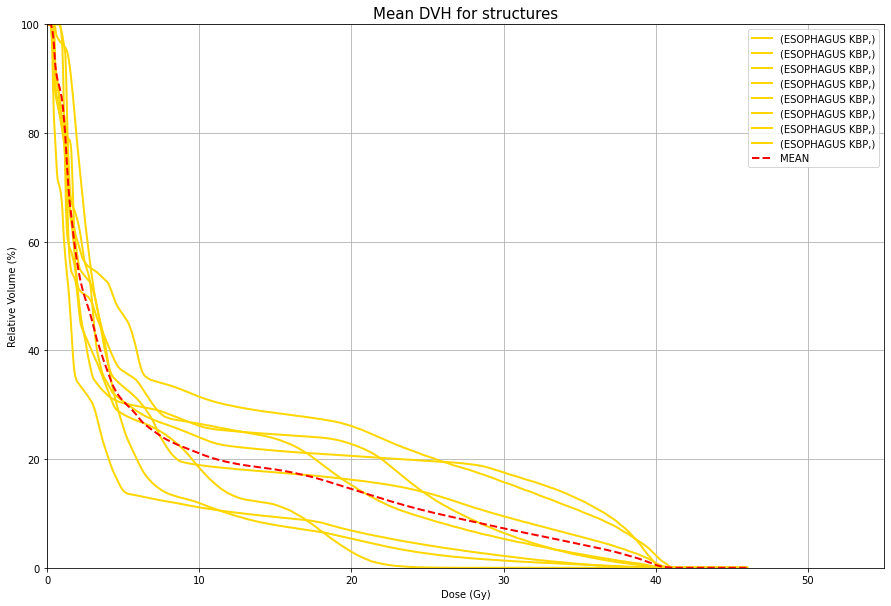

In [93]:
#4OKAY 1 ALL_ VS MEAN
#ESOPHAGUS KBP
ax=ESOPHAGUS_KBP.plot(figsize=(15,10),markevery=25,color='gold',linewidth=2.0)
df_ESOPHAGUS_kbp.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('ESOPHAGUS_KBP_ALL.pdf')  

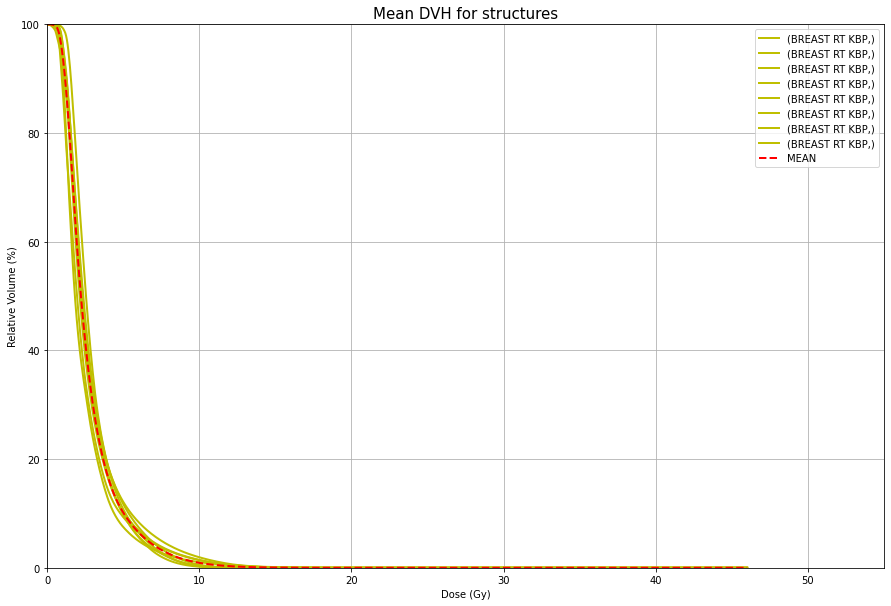

In [94]:
#OKAY 1 ALL_ VS MEAN
#5BREAST RT KBP
ax=BREASTRT_KBP.plot(figsize=(15,10),markevery=25,color='Y',linewidth=2.0)
df_BREASTRT_kbp.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('BREAST_RT_KBP_ALL.pdf')  


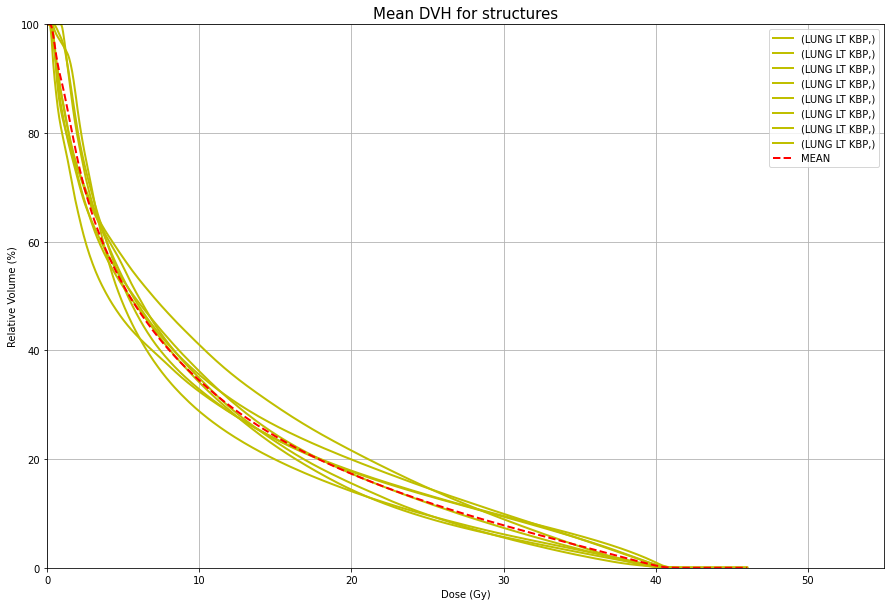

In [97]:
#6OKAY 1 ALL_ VS MEAN
#LUNG LT KBP
ax=LUNGLT_KBP.plot(figsize=(15,10),markevery=25,color='Y',linewidth=2.0)
df_LUNGLT_kbp.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('LUNGLT_KBP_ALL.pdf')  


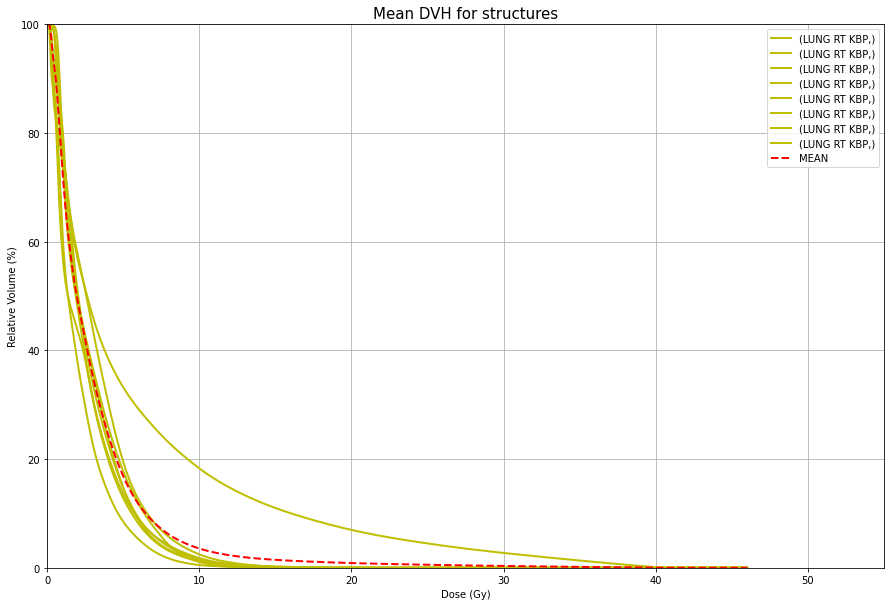

In [98]:
#7OKAY 1 ALL_ VS MEAN
#LUNG RT
ax=LUNGRT_KBP.plot(figsize=(15,10),markevery=25,color='Y',linewidth=2.0)
df_LUNGRT_kbp.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('LUNGRT_KBP_ALL.pdf')  


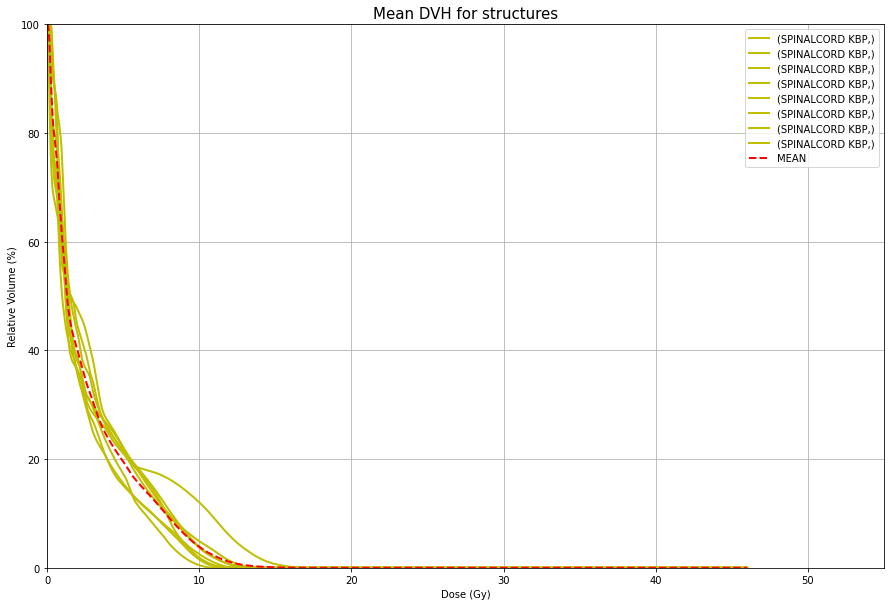

In [99]:
#8OKAY 1 ALL_ VS MEAN
#SPINALCORD KBP
ax=SPINALCORD_KBP.plot(figsize=(15,10),markevery=25,color='Y',linewidth=2.0)
df_SPINALCORD_kbp.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('SPINALCORD_KBP_ALL.pdf')  


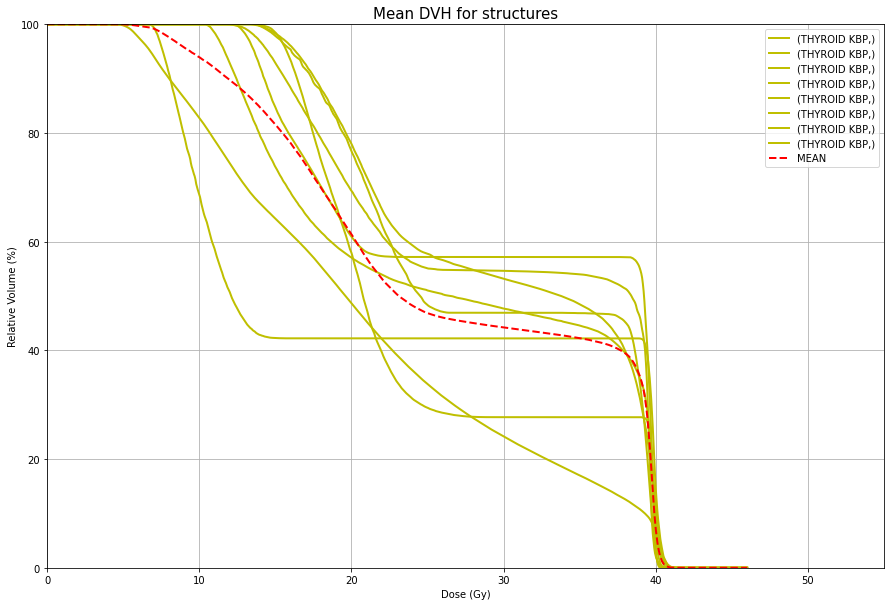

In [100]:
#9OKAY 1 ALL_ VS MEAN
#THYROID KBP
ax=THYROID_KBP.plot(figsize=(15,10),markevery=25,color='Y',linewidth=2.0)
df_THYROID_kbp.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('THYROID_KBP_ALL.pdf')  


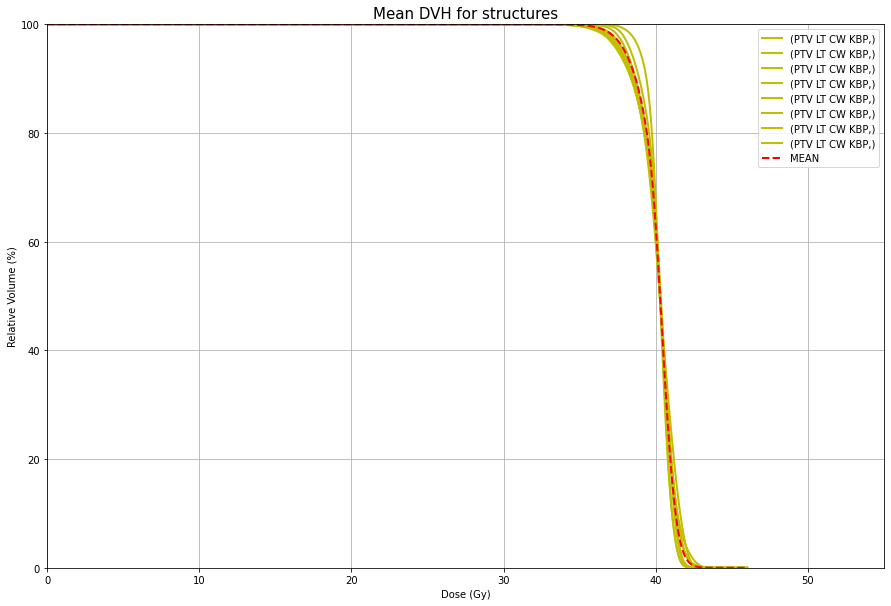

In [101]:
#10OKAY 1 ALL_ VS MEAN
#PTV LT CW KBP
ax=PTVLTCW_KBP.plot(figsize=(15,10),markevery=25,color='Y',linewidth=2.0)
df_PTVLTCW_kbp.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('PTVLTCW_KBP_ALL.pdf')  


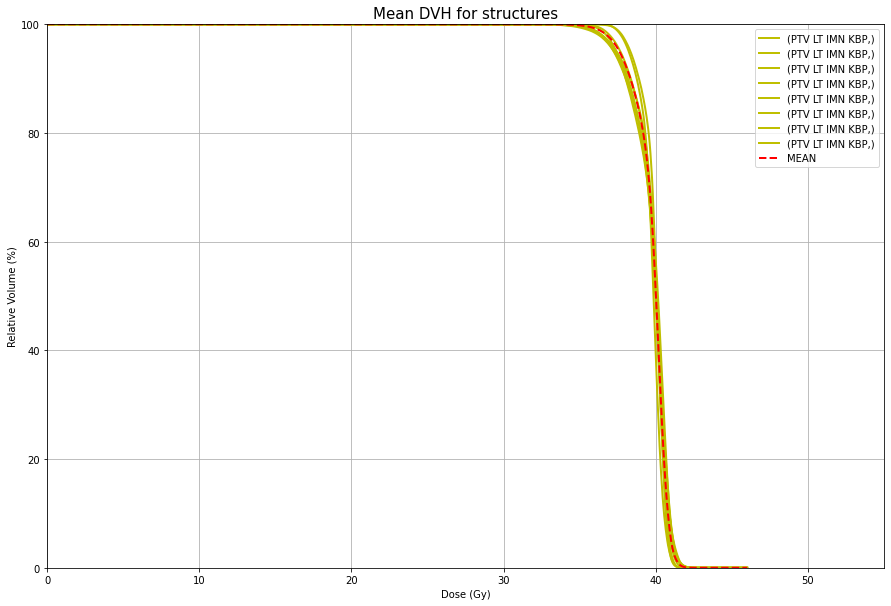

In [102]:
#11OKAY 1 ALL_ VS MEAN
#PTV LT IMN KBP
ax=PTVLTIMN_KBP.plot(figsize=(15,10),markevery=25,color='Y',linewidth=2.0)
df_PTVLTIMN_kbp.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('PTVLTIMN_KBP_ALL.pdf')  


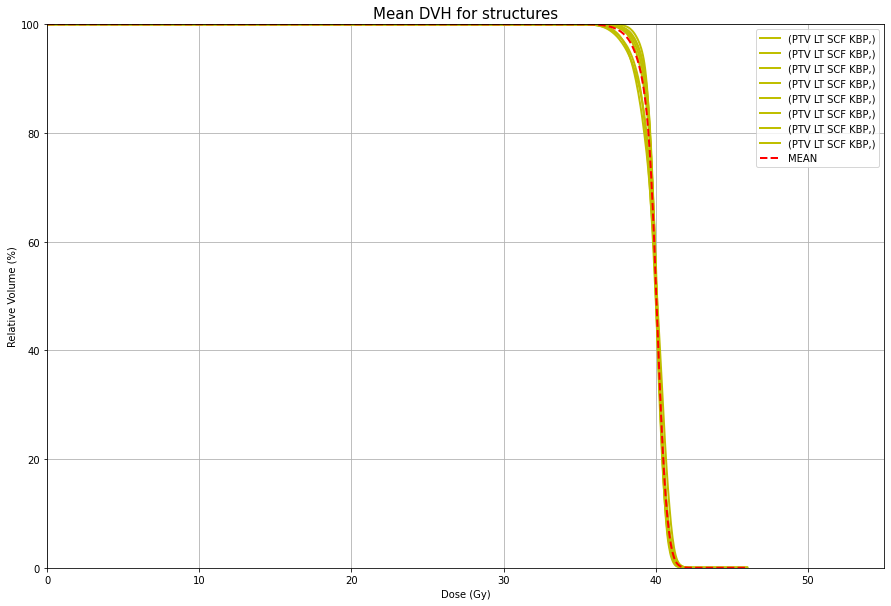

In [103]:
#12OKAY 1 ALL_ VS MEAN
#PTV LT SCF KBP
ax=PTVLTSCF_KBP.plot(figsize=(15,10),markevery=25,color='Y',linewidth=2.0)
df_PTVLTSCF_kbp.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('PTVLTSCF_KBP_ALL.pdf')  


In [ ]:
df_HEART_cli

In [ ]:
#1BODY CLI
#OKAY 1 ALL_ VS MEAN
ax=BODY_CLI.plot(figsize=(15,10),markevery=25,color='gold',linewidth=2.0)
df_BODY_cli.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('BODY_ALL.pdf')  

In [ ]:
#2heart
#OKAY 1 ALL_ VS MEAN
ax=HEART_CLI.plot(figsize=(15,10),markevery=25,color='gold',linewidth=2.0)
df_HEART_cli.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('HEART_ALL.pdf')  

In [ ]:
#3OKAY 1 ALL_ VS MEAN
#LAD
ax=LAD_CLI.plot(figsize=(15,10),markevery=25,color='gold',linewidth=2.0)
df_LAD_cli.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('LAD_ALL.pdf')  

In [ ]:
#4OKAY 1 ALL_ VS MEAN
#ESOPHAGUS
ax=ESOPHAGUS_CLI.plot(figsize=(15,10),markevery=25,color='gold',linewidth=2.0)
df_ESOPHAGUS_cli.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('ESOPHAGUS.pdf')  

In [ ]:
#OKAY 1 ALL_ VS MEAN
#5BREAST RT
ax=BREASTRT_CLI.plot(figsize=(15,10),markevery=25,color='Y',linewidth=2.0)
df_BREASTRT_cli.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('BREAST_RT_ALL.pdf')  


In [ ]:
#6OKAY 1 ALL_ VS MEAN
#LUNG LT
ax=LUNGLT_CLI.plot(figsize=(15,10),markevery=25,color='Y',linewidth=2.0)
df_LUNGLT_cli.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('LUNGLT_ALL.pdf')  


In [ ]:
#7OKAY 1 ALL_ VS MEAN
#LUNG RT
ax=LUNGRT_CLI.plot(figsize=(15,10),markevery=25,color='Y',linewidth=2.0)
df_LUNGRT_cli.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('LUNGRT_ALL.pdf')  


In [ ]:
#8OKAY 1 ALL_ VS MEAN
#SPINALCORD
ax=SPINALCORD_CLI.plot(figsize=(15,10),markevery=25,color='Y',linewidth=2.0)
df_SPINALCORD_cli.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('SPINALCORD_ALL.pdf')  


In [ ]:
#9OKAY 1 ALL_ VS MEAN
#THYROID
ax=THYROID_CLI.plot(figsize=(15,10),markevery=25,color='Y',linewidth=2.0)
df_THYROID_cli.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('THYROID_ALL.pdf')  


In [ ]:
#10OKAY 1 ALL_ VS MEAN
#PTV LT CW
ax=PTVLTCW_CLI.plot(figsize=(15,10),markevery=25,color='Y',linewidth=2.0)
df_PTVLTCW_cli.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('PTVLTCW_ALL.pdf')  


In [ ]:
#11OKAY 1 ALL_ VS MEAN
#PTV LT IMN
ax=PTVLTIMN_CLI.plot(figsize=(15,10),markevery=25,color='Y',linewidth=2.0)
df_PTVLTIMN_cli.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('PTVLTIMN_ALL.pdf')  


In [ ]:
#12OKAY 1 ALL_ VS MEAN
#PTV LT SCF
ax=PTVLTSCF_CLI.plot(figsize=(15,10),markevery=25,color='Y',linewidth=2.0)
df_PTVLTSCF_cli.plot(ax=ax,markevery=25,color='r',linestyle='dashed',linewidth=2.0,label="MEAN")
plt.title('Mean DVH for structures', fontsize=15)
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('PTVLTSCF_ALL.pdf')  


NEXT SINGLE ORGAN


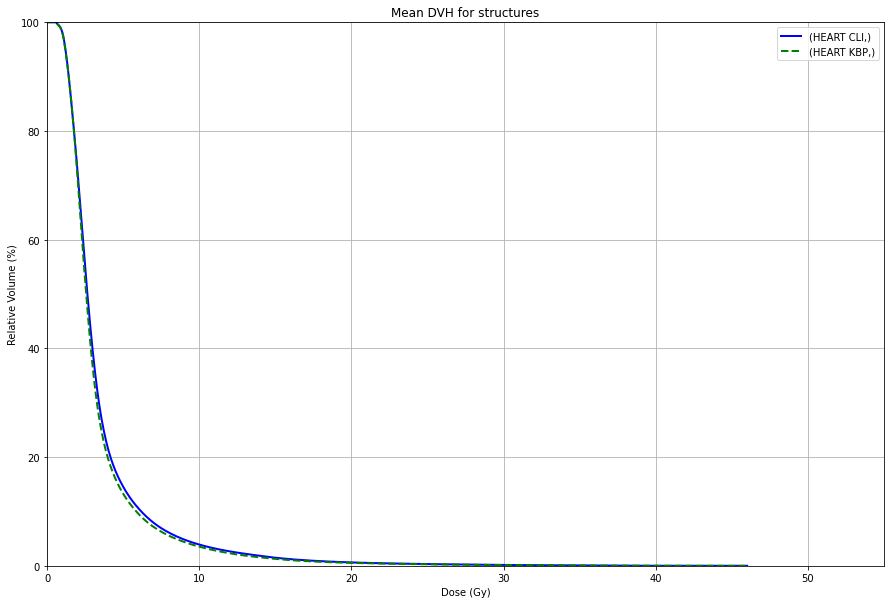

In [104]:
#OKAY PLOT EACH ORGANS
#1 HEART
ax=df_HEART_cli.plot(figsize=(15,10),markevery=25,color='b',linewidth=2.0)
df_HEART_kbp.plot(ax=ax,markevery=25,color='g',linewidth=2.0,linestyle='dashed')
plt.title('Mean DVH for structures')
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('HEART_MEAN_CMPR.pdf')


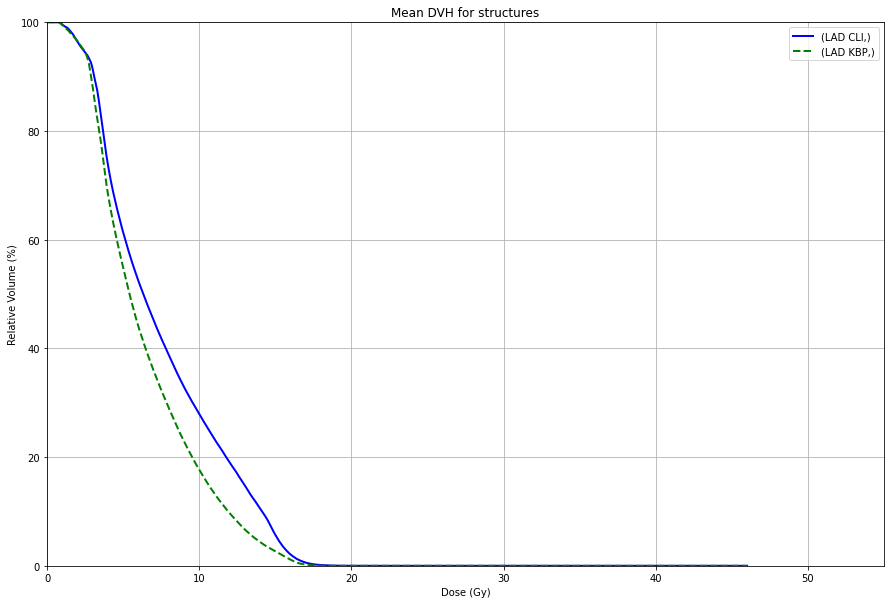

In [105]:
#OKAY PLOT EACH ORGANS
#2 LAD
ax=df_LAD_cli.plot(figsize=(15,10),markevery=25,color='b',linewidth=2.0)
df_LAD_kbp.plot(ax=ax,markevery=25,color='g',linewidth=2.0,linestyle='dashed')
plt.title('Mean DVH for structures')
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('LAD_MEAN_CMPR.pdf')

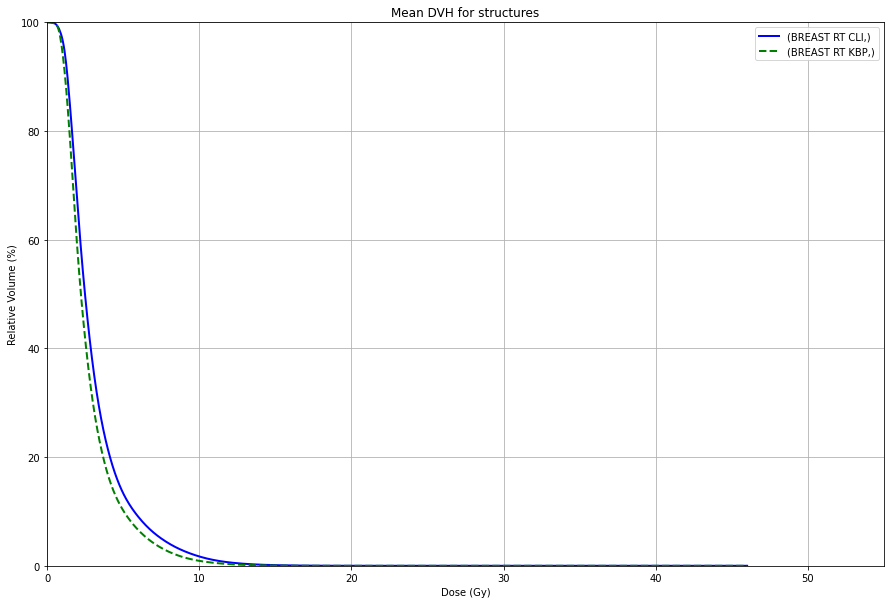

In [106]:
#OKAY PLOT EACH ORGANS
#3 BREAST RT
ax=df_BREASTRT_cli.plot(figsize=(15,10),markevery=25,color='b',linewidth=2.0)
df_BREASTRT_kbp.plot(ax=ax,markevery=25,color='g',linewidth=2.0,linestyle='dashed')
plt.title('Mean DVH for structures')
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('BREAST_RT_MEAN_CMPR.pdf')

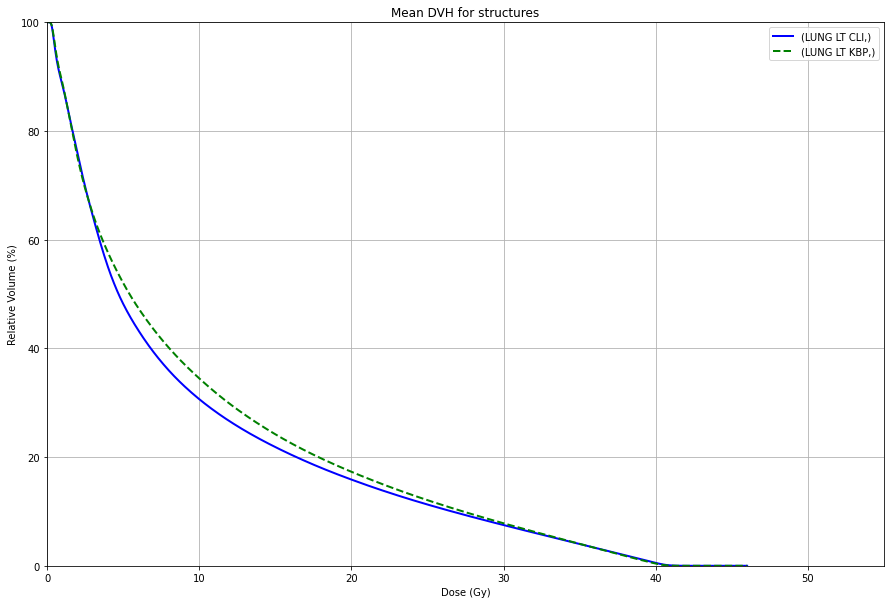

In [107]:
#OKAY PLOT EACH ORGANS
#4 LUNG LT
ax=df_LUNGLT_cli.plot(figsize=(15,10),markevery=25,color='b',linewidth=2.0)
df_LUNGLT_kbp.plot(ax=ax,markevery=25,color='g',linewidth=2.0,linestyle='dashed')
plt.title('Mean DVH for structures')
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('LUNGLT_MEAN_CMPR.pdf')

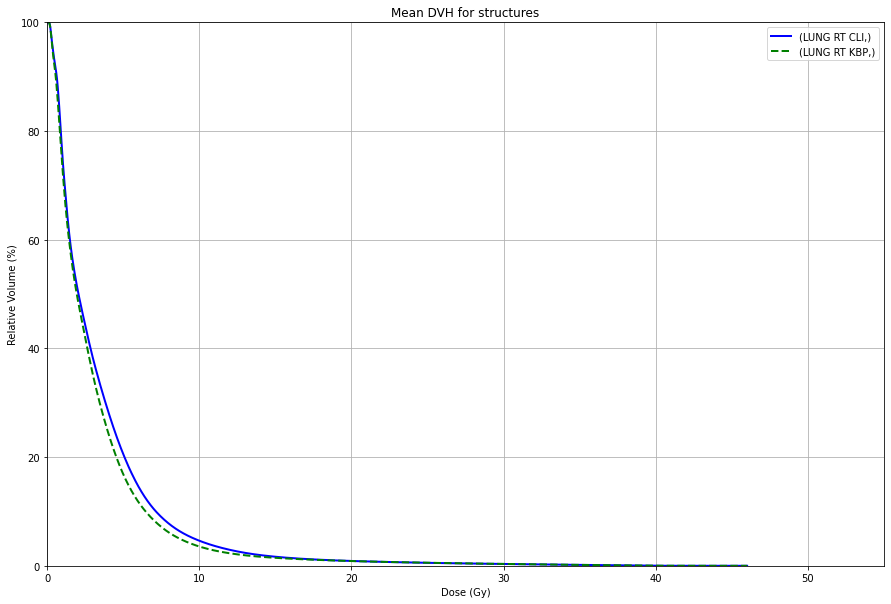

In [108]:
#OKAY PLOT EACH ORGANS
#5 LUNG RT
ax=df_LUNGRT_cli.plot(figsize=(15,10),markevery=25,color='b',linewidth=2.0)
df_LUNGRT_kbp.plot(ax=ax,markevery=25,color='g',linewidth=2.0,linestyle='dashed')
plt.title('Mean DVH for structures')
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('LUNGRT_MEAN_CMPR.pdf')

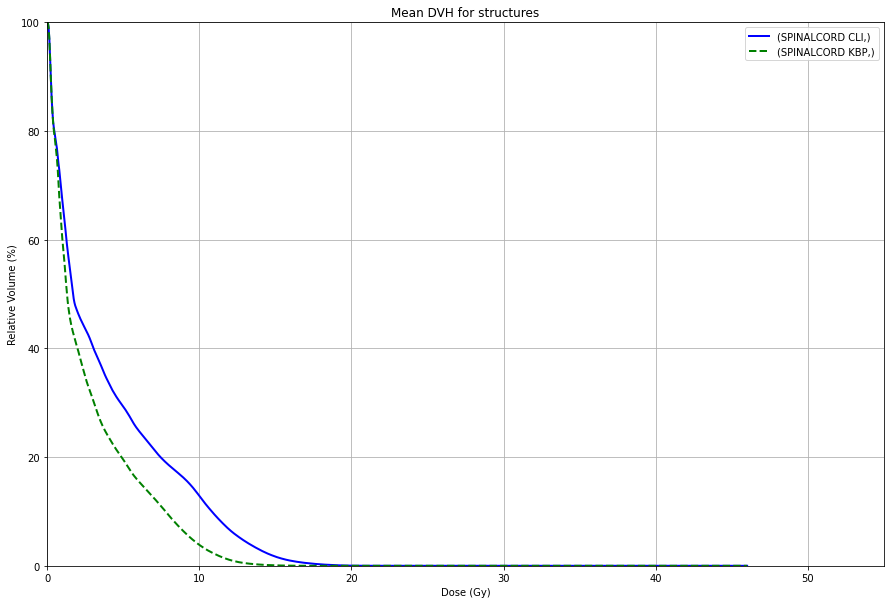

In [109]:
#OKAY PLOT EACH ORGANS
#6 SPINALCORD
ax=df_SPINALCORD_cli.plot(figsize=(15,10),markevery=25,color='b',linewidth=2.0)
df_SPINALCORD_kbp.plot(ax=ax,markevery=25,color='g',linewidth=2.0,linestyle='dashed')
plt.title('Mean DVH for structures')
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('SPINALCORD_MEAN_CMPR.pdf')

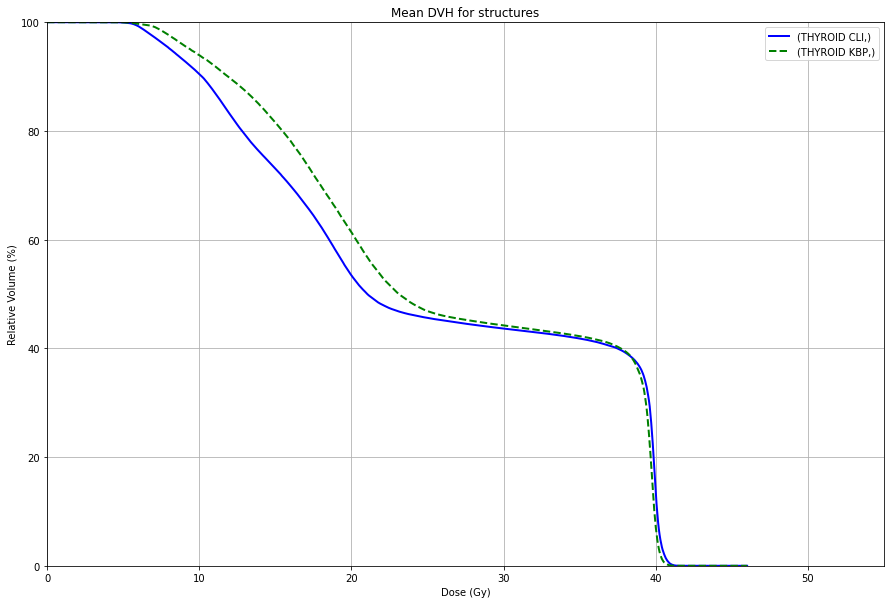

In [110]:
#OKAY PLOT EACH ORGANS
#8 THYROID
ax=df_THYROID_cli.plot(figsize=(15,10),markevery=25,color='b',linewidth=2.0)
df_THYROID_kbp.plot(ax=ax,markevery=25,color='g',linewidth=2.0,linestyle='dashed')
plt.title('Mean DVH for structures')
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('THYROID_MEAN_CMPR.pdf')

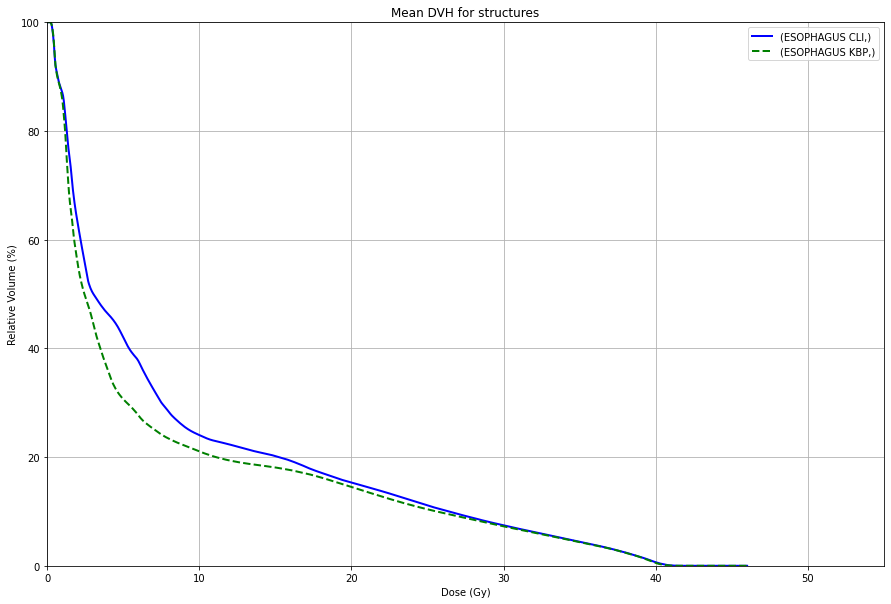

In [111]:
#OKAY PLOT EACH ORGANS
#9 ESOPHAGUS
ax=df_ESOPHAGUS_cli.plot(figsize=(15,10),markevery=25,color='b',linewidth=2.0)
df_ESOPHAGUS_kbp.plot(ax=ax,markevery=25,color='g',linewidth=2.0,linestyle='dashed')
plt.title('Mean DVH for structures')
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('ESOPHAGUS_MEAN_CMPR.pdf')

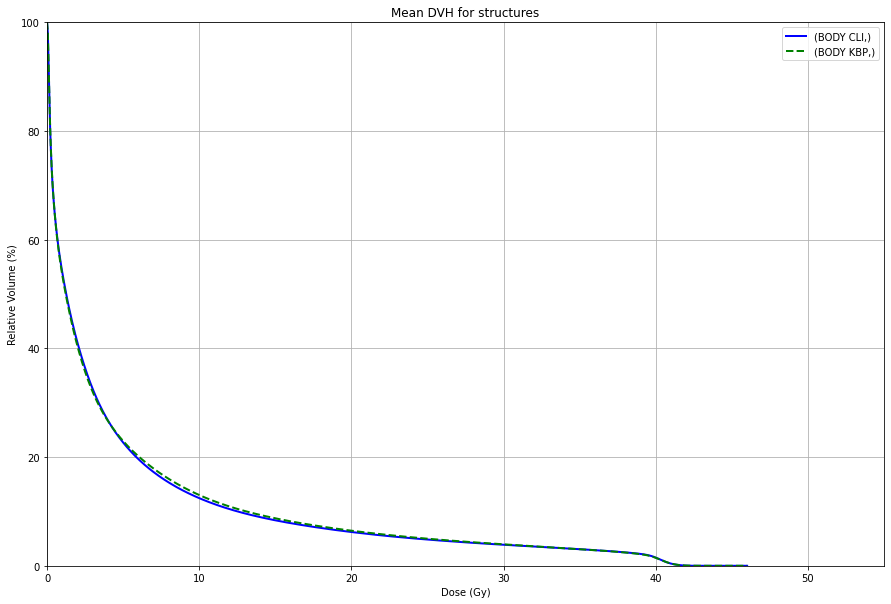

In [112]:
#OKAY PLOT EACH ORGANS
#9 BODY
ax=df_BODY_cli.plot(figsize=(15,10),markevery=25,color='b',linewidth=2.0)
df_BODY_kbp.plot(ax=ax,markevery=25,color='g',linewidth=2.0,linestyle='dashed')
plt.title('Mean DVH for structures')
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('BODY_MEAN_CMPR.pdf')

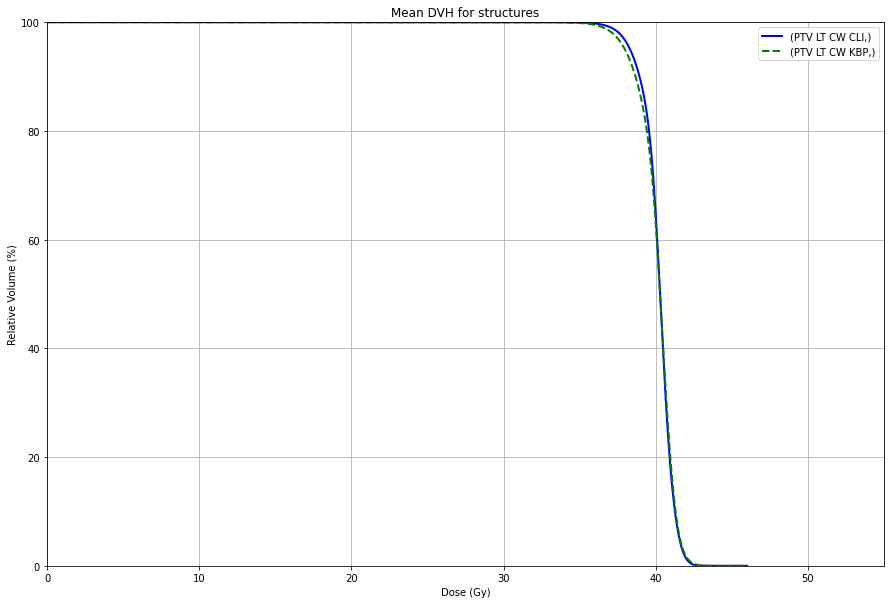

In [113]:
#OKAY PLOT EACH ORGANS
#10 PTV LT CW
ax=df_PTVLTCW_cli.plot(figsize=(15,10),markevery=25,color='b',linewidth=2.0)
df_PTVLTCW_kbp.plot(ax=ax,markevery=25,color='g',linewidth=2.0,linestyle='dashed')
plt.title('Mean DVH for structures')
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('PTVLTCW_MEAN_CMPR.pdf')

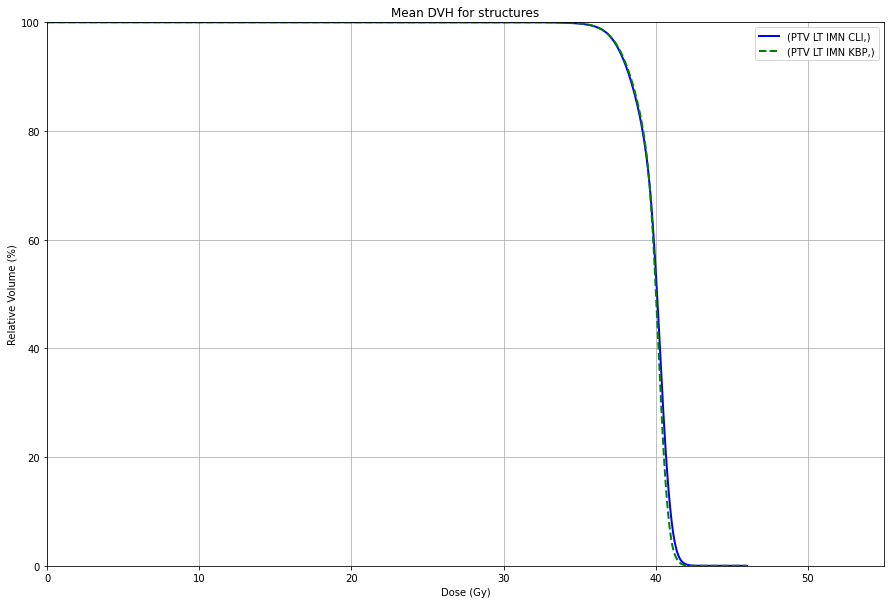

In [114]:
#OKAY PLOT EACH ORGANS
#11 PTV LT IMN
ax=df_PTVLTIMN_cli.plot(figsize=(15,10),markevery=25,color='b',linewidth=2.0)
df_PTVLTIMN_kbp.plot(ax=ax,markevery=25,color='g',linewidth=2.0,linestyle='dashed')
plt.title('Mean DVH for structures')
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('PTVLTIMN_MEAN_CMPR.pdf')

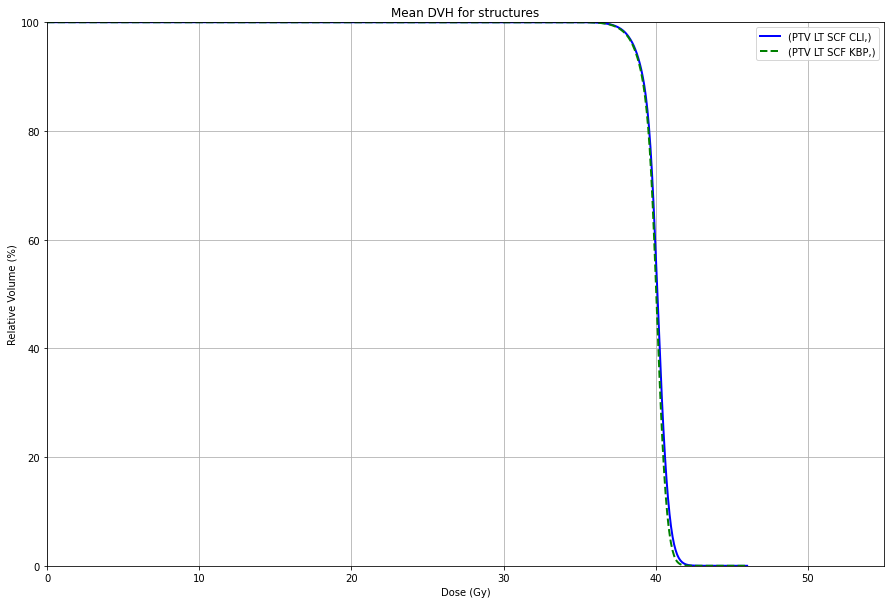

In [115]:
#OKAY PLOT EACH ORGANS
#12 PTV LT SCF
ax=df_PTVLTSCF_cli.plot(figsize=(15,10),markevery=25,color='b',linewidth=2.0)
df_PTVLTSCF_kbp.plot(ax=ax,markevery=25,color='g',linewidth=2.0,linestyle='dashed')
plt.title('Mean DVH for structures')
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('PTVLTSCF_MEAN_CMPR.pdf')

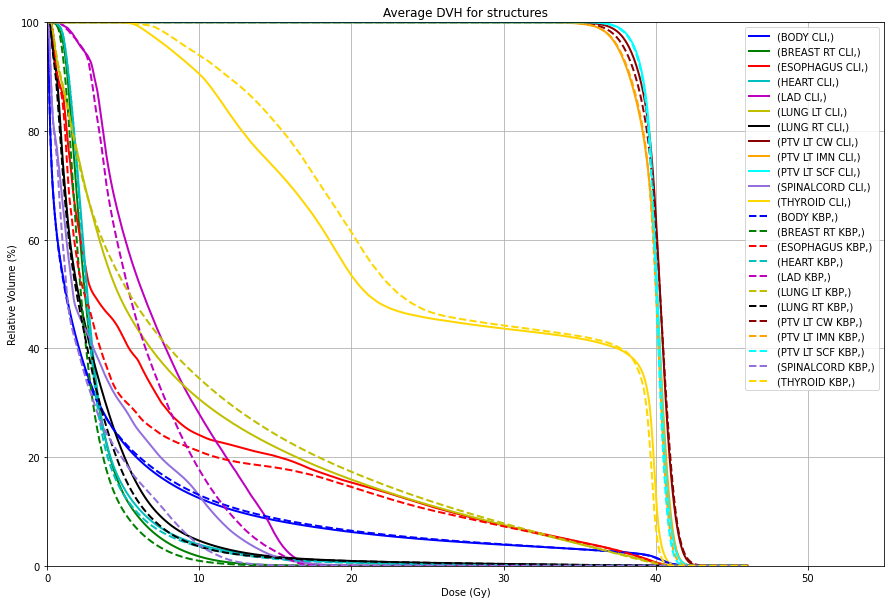

In [116]:
#OKAY PLOT SUMMARY
ax=df_cli_mean.plot(figsize=(15,10),markevery=25,color=my_colors,linewidth=2.0)
df_kbp_mean.plot(ax=ax,markevery=25,linewidth=2.0,color=my_colors,linestyle='dashed')
plt.title('Average DVH for structures')
plt.ylabel('Relative Volume (%)')
plt.grid(True)
axes = plt.gca()
axes.set_xlim([0,plot_lim])
axes.set_ylim([0,100])
plt.legend()
plt.savefig('SUMMARY_MEAN_KBP_VS_CLI.pdf')

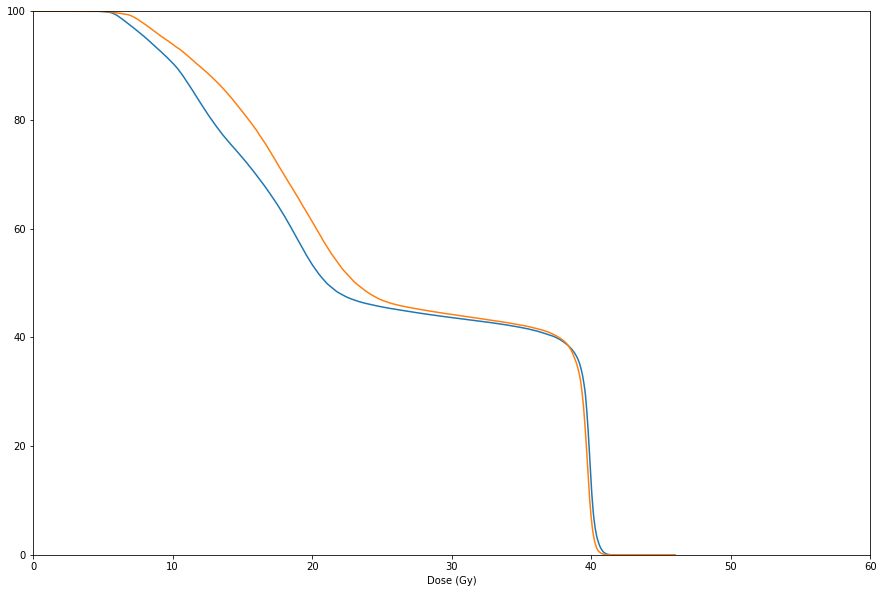

In [ ]:
fig = plt.figure()

for frame in [df_THYROID_cli,df_THYROID_kbp]:
    frame.plot(figsize=(15,10))

plt.xlim(0,60)
plt.ylim(0,100)
plt.show()

ACTUAL PROGRAM